In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
df.duplicated().sum()

0

In [16]:
df.drop(columns=["Unnamed: 0"], inplace=True)


In [17]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# feature selection

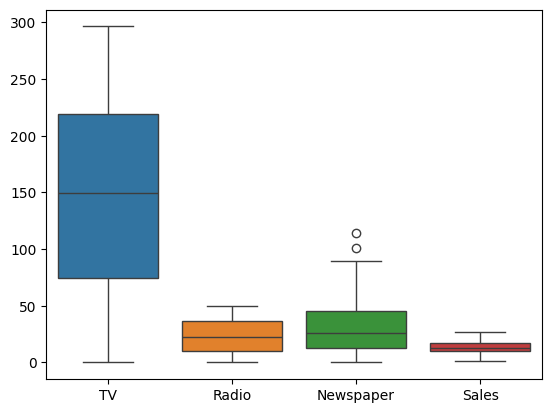

In [18]:
sns.boxplot(data=df) #outlier detection
plt.show()

In [19]:
corr=df.corr()

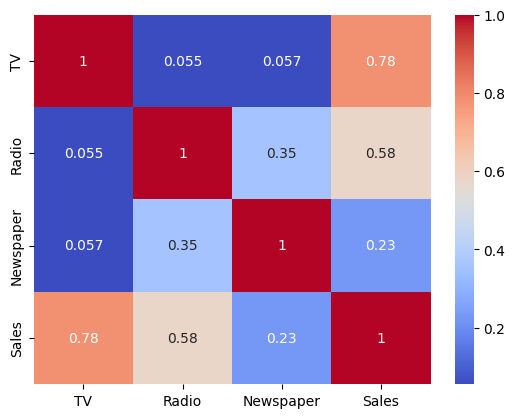

In [20]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


Correlation analysis shows that Sales has a strong positive relationship with TV advertising, a moderate relationship with Radio, and a weak relationship with Newspaper. This suggests that TV and Radio are the most important predictors of sales, while Newspaper has little effect.

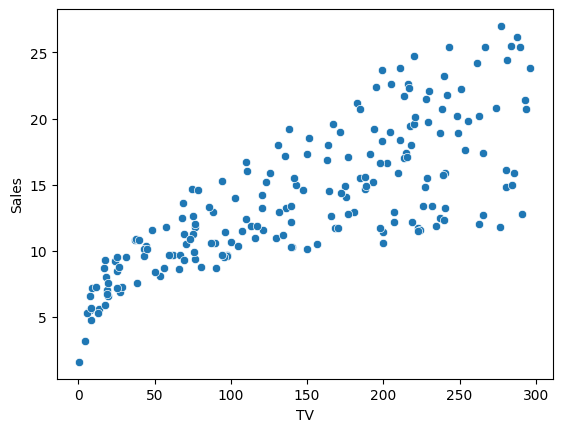

In [21]:
sns.scatterplot(x="TV", y="Sales", data=df)
plt.show()


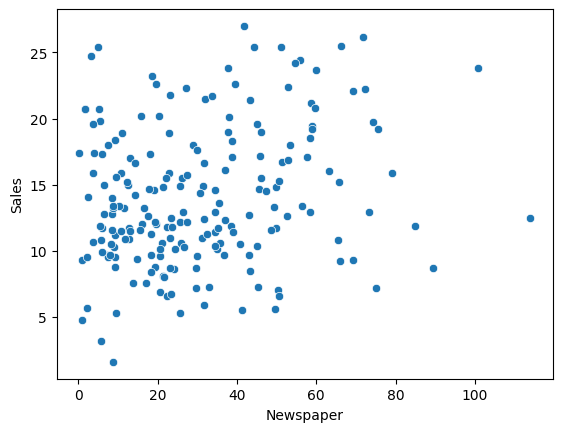

In [22]:
sns.scatterplot(x="Newspaper", y="Sales", data=df)
plt.show()

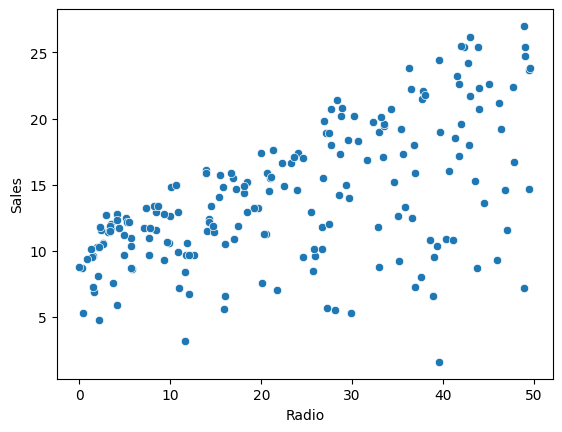

In [25]:
sns.scatterplot(x="Radio",y="Sales", data=df)
plt.show()

# we create a dist plot to view if  data is skeweed or not

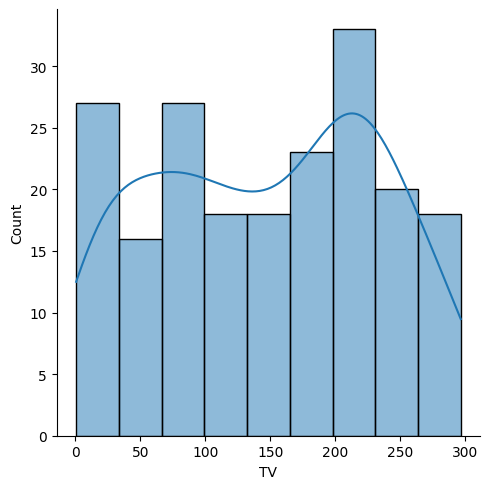

In [26]:
sns.displot(df['TV'], kde=True)
plt.show()


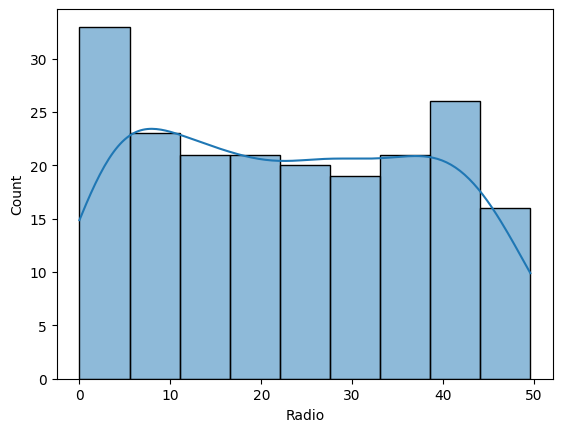

In [27]:
sns.histplot(df['Radio'],kde=True)
plt.show()

as we see above data is skweed so we apply logrithmetic function

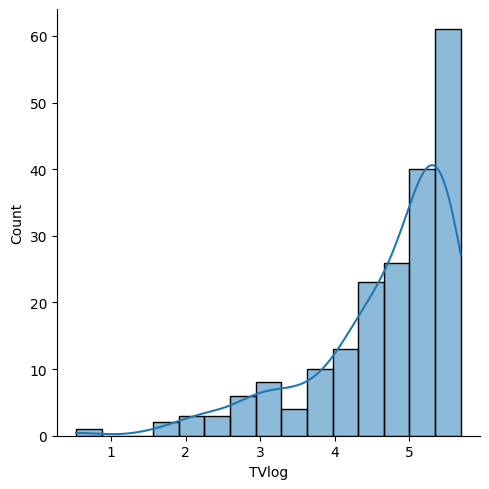

In [28]:
df['TVlog']=np.log(df['TV']+1)
sns.displot(df['TVlog'],kde=True)
plt.show()

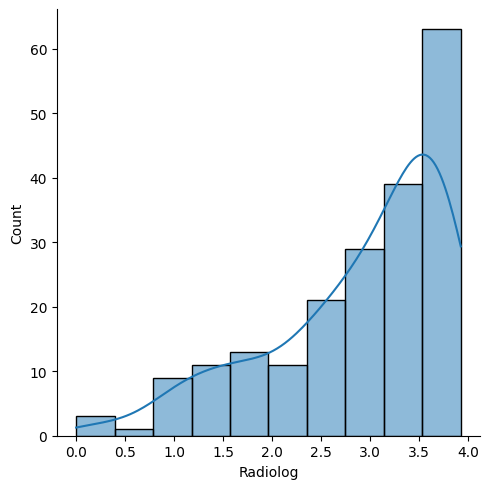

In [29]:
df['Radiolog']=np.log(df['Radio']+1)
sns.displot(df['Radiolog'],kde=True)
plt.show()

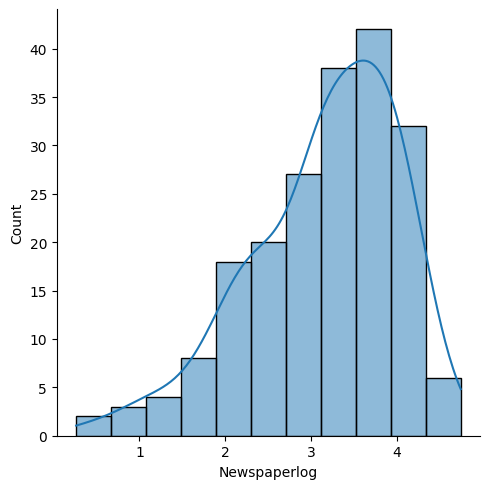

In [30]:
df['Newspaperlog']=np.log(df['Newspaper']+1)
sns.displot(df['Newspaperlog'],kde=True)
plt.show()

In [31]:
df.head()

,TV,Radio,Newspaper,Sales,TVlog,Radiolog,Newspaperlog
0,230.1,37.8,69.2,22.1,5.442851,3.658420,4.251348
1,44.5,39.3,45.1,10.4,3.817712,3.696351,3.830813
2,17.2,45.9,69.3,9.3,2.901422,3.848018,4.252772
3,151.5,41.3,58.5,18.5,5.027165,3.744787,4.085976
4,180.8,10.8,58.4,12.9,5.202907,2.468100,4.084294


In [32]:
df.drop(['TV','Radio','Newspaper'],axis=1,inplace=True)

In [33]:
df

,Sales,TVlog,Radiolog,Newspaperlog
0,22.1,5.442851,3.658420,4.251348
1,10.4,3.817712,3.696351,3.830813
2,9.3,2.901422,3.848018,4.252772
3,18.5,5.027165,3.744787,4.085976
4,12.9,5.202907,2.468100,4.084294
...,...,...,...,...
195,7.6,3.668677,1.547563,2.694627
196,9.7,4.555980,1.774952,2.208274
197,12.8,5.181784,2.332144,2.001480
198,25.5,5.651085,3.761200,4.207673


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=df.drop('Sales',axis=1)
Y=df['Sales']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=14,test_size=0.2)

In [37]:
x_train

,TVlog,Radiolog,Newspaperlog
172,3.025291,3.049273,2.890372
163,5.102911,3.632309,2.128232
14,5.323498,3.523415,3.850148
58,5.355642,3.923952,3.655840
20,5.390897,3.356897,3.996364
...,...,...,...
71,4.707727,2.727853,3.487375
150,5.640843,2.701361,3.637586
12,3.210844,3.586293,4.203199
88,4.492001,3.277145,4.309456


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([15.55824852,  6.09679474, 20.50624214, 12.60420815,  7.22154393,
       19.46500504, 10.92731301, 19.34148009, 11.98284089, 15.48377609,
       19.61939097,  0.37271704, 13.28272957, 20.80153426, 12.02553648,
       19.68036451,  9.37065962, 17.36636675,  9.2991982 , 11.59127268,
        6.98986202,  9.16834619, 14.39527047,  6.13814914, 17.29027409,
       17.55875994, 13.75934144, 16.990004  , 12.37055889,  5.92697475,
       14.53142869, 12.68273799, 15.81179167, 11.84789521,  5.83100927,
       14.26187821, 18.99977031, 13.3940259 , 18.12824235, -0.64635979])

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8700005140986911
MAE: 1.6698424952440647
MSE: 4.448488157915513
RMSE: 2.1091439395914904


After seeing the above results i come to the point that my model works well

# Generate a pie chart to analyze the sales 

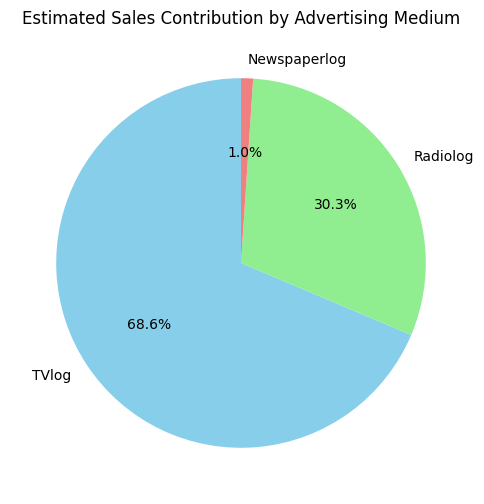

In [43]:
contrib = model.coef_ * X.mean()
# Take absolute values (for pie chart)
contrib_abs = np.abs(contrib)
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(contrib_abs, labels=X.columns, autopct="%1.1f%%", startangle=90,
        colors=["skyblue", "lightgreen", "lightcoral"])
plt.title("Estimated Sales Contribution by Advertising Medium")
plt.show()

so by analysizing we come to the point that tv generate a lot of sales